# Librerías necesarias

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tf.__version__ # versión de tensorflow debe ser 2.19.0, si no actualizarla

'2.18.0'

# Leyendo los datos

In [9]:
# Cambiar nombre de datos al suyo
x1_load = np.load('David_X.npy')
y1_load = np.load('David_Y.npy')

In [10]:
x_test = np.load('x_test_fed.npy')
y_test = np.load('y_test_fed.npy')

# Entrenamiento y validación

In [11]:
from sklearn.metrics import classification_report

def train_and_verify(local_model, x_train, y_train, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    local_model.save(save_name)

<Sequential name=sequential_1, built=True>
Epoch 1/5


d:\Program Files (x86)\Python 3.11.0\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7418 - loss: 0.8566 - val_accuracy: 0.9578 - val_loss: 0.1410
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9657 - loss: 0.1110 - val_accuracy: 0.9723 - val_loss: 0.0884
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9749 - loss: 0.0803 - val_accuracy: 0.9735 - val_loss: 0.0814
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9832 - loss: 0.0478 - val_accuracy: 0.9785 - val_loss: 0.0699
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0341 - val_accuracy: 0.9758 - val_loss: 0.0766
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.93      1.00      0.96      1010
           4       0.99      0.98      0.99       982
    

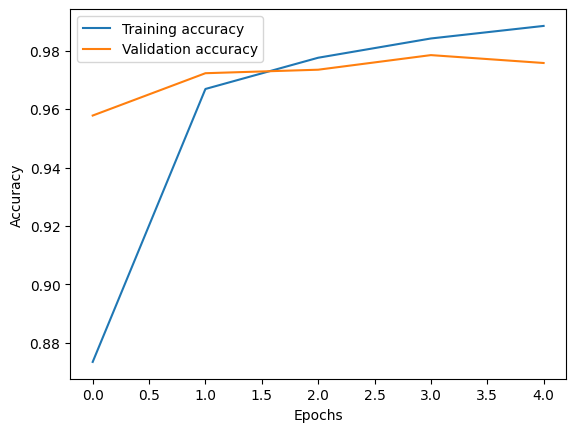

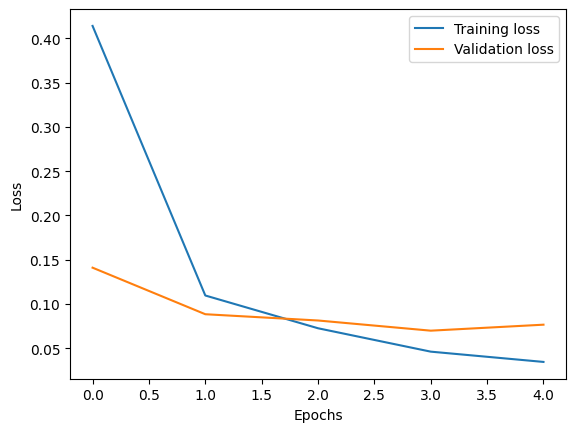

In [12]:
from TheModel import build
local_model = build.build_it()

train_and_verify(local_model, x1_load, y1_load, 5, x_test, y_test, "lmodel_David_G.keras") # cambiar nombre de modelo a guardar